In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

def analyze_single_sample(sample):
    # Display instruction evolution
    def display_instruction_evolution(instruction_data):
        html = f"<h3>Original Instruction: {instruction_data['original_instruction']}</h3>"
        html += "<table><tr><th>Stage</th><th>Input Instruction</th><th>Final Evolved Instruction</th></tr>"
        
        for stage in instruction_data['stages']:
            html += f"<tr><td>{stage['stage']}</td><td>{stage['input_instruction']}</td><td>{stage['final_evolved_instruction']}</td></tr>"
            
        html += f"<tr><td>Final</td><td colspan='2'>{instruction_data['final_instruction']}</td></tr>"
        html += "</table>"
        
        display(HTML(html))
    
    display_instruction_evolution(sample)
    
    # Word count analysis
    def word_count(text):
        return len(text.split())
    
    stage_word_counts = {0: word_count(sample['original_instruction'])}
    for i, stage in enumerate(sample['stages']):
        stage_word_counts[i+1] = word_count(stage['final_evolved_instruction'])
    # stage_word_counts[len(sample['stages'])] = word_count(sample['final_instruction'])
    
    plt.figure(figsize=(10, 6))
    plt.plot(list(stage_word_counts.keys()), list(stage_word_counts.values()), marker='o')
    plt.title('Word Count of Instructions by Stage')
    plt.xlabel('Stage (0: Original, 0 to N-1: Intermediate, N: Final)')
    plt.ylabel('Word Count')
    plt.xticks(range(0, len(sample['stages']) + 1))
    plt.grid(True)
    plt.show()
    
    # Display methods used in each stage
    def display_methods(instruction_data):
        html = "<h3>Methods Used in Each Stage</h3>"
        html += "<table><tr><th>Stage</th><th>Method</th></tr>"
        
        for stage in instruction_data['stages']:
            html += f"<tr><td>{stage['stage']}</td><td>{stage['optimized_method'][:500]}...</td></tr>"
        
        html += "</table>"
        
        display(HTML(html))
    
    display_methods(sample)
    
    # Display statistics
    num_stages = len(sample['stages'])
    print(f"Number of stages: {num_stages}")
    
    # Display evolved instructions and feedbacks
    for i, stage in enumerate(sample['stages']):
        print(f"\nStage {i + 1}")
        print("Evolved Instructions:")
        for j, instruction in enumerate(stage['evolved_instructions']):
            print(f"  {j + 1}. {instruction}")
        print("\nFeedbacks:")
        for j, feedback in enumerate(stage['feedbacks']):
            print(f"  {j + 1}. {feedback}")

    # Display final instruction
    print(f"\nFinal Instruction: {sample['final_instruction']}")

In [4]:
with open('/Users/qnguyen3/Downloads/the_tomb_evolved-3e_batch1.json', 'r') as f:
    data = json.load(f)

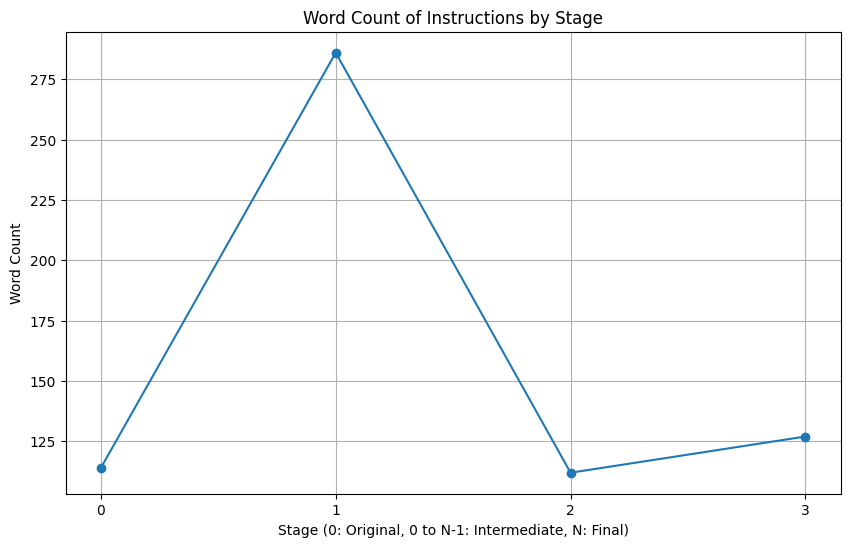

Stage,Method
1,"You are an Instruction Rewriter that rewrites the given #Instruction# into a more complex version. Please follow the steps below to rewrite the given ""#Instruction#"" into a more complex version. Step 1: To generate a list of methods to make instructions more complex, consider incorporating elements that challenge AI's understanding by introducing hypothetical scenarios, asking for the evaluation of multiple solutions, and requiring the explanation of steps taken. Additionally, include methods ..."
2,"You are an Instruction Rewriter that rewrites the given #Instruction# into a more complex version. Please follow the steps below to rewrite the given ""#Instruction#"" into a more complex version. Step 1: To generate a list of methods to make instructions more complex, consider incorporating elements such as: 1.1. Introducing multi-level hypothetical scenarios that require the AI to consider various possible outcomes and their implications. 1.2. Asking for the evaluation of multiple solutions, ..."
3,"You are an Instruction Rewriter that rewrites the given #Instruction# into a more complex version. Please follow the steps below to rewrite the given ""#Instruction#"" into a more complex version. Step 1: To create a list of methods for enhancing instruction complexity, consider integrating: 1.1. Nested hypothetical scenarios that explore the implications of various outcomes on multiple levels. 1.2. Comparative analysis of solutions, requiring the evaluation of their relative effectiveness in di..."


Number of stages: 3

Stage 1
Evolved Instructions:
  1. ```Optimized Instruction
Step 1:
#Methods List# - Incorporate mathematical notations for clarity. - Request a detailed step-by-step explanation of the verification process. - Ask for confirmation on the correct usage of combinatorial formulas. - Inquire about potential alternative approaches to solving the problem.

Step 2:
#Plan# - Add mathematical notations to clarify the combinatorial expressions. - Request a detailed, sequential verification of the solution's logic and calculations. - Seek confirmation on the proper application of combinatorial formulas. - Encourage consideration of alternative problem-solving strategies.

Step 3:
#Rewritten Instruction# - Please meticulously verify my approach to solving the following problem, employing combinatorial formulas: In triangle \(ABC\), there are 3 distinct points on side \(AB\), 4 distinct points on side \(BC\), and 5 distinct points on side \(AC\). How many different quadrilatera

In [7]:
analyze_single_sample(data[600])